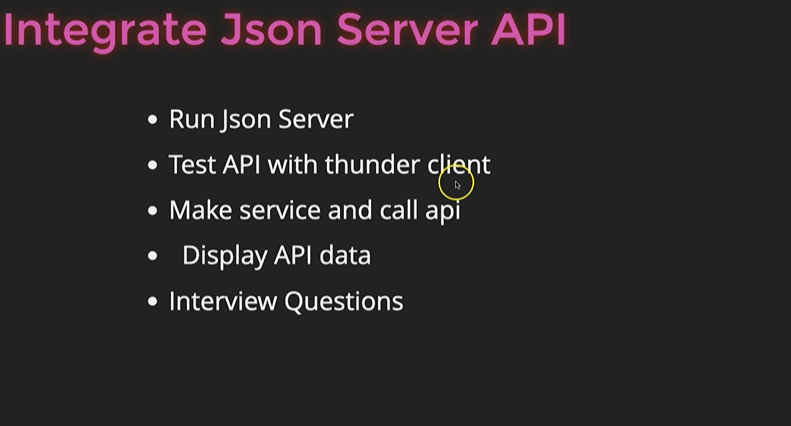

# **db.json**



```
{
  "users": [
    {
      "name": "Ajay Karre",
      "email": "ajay.karre@example.com"
    },
    {
      "name": "Priya Sharma",
      "email": "priya.sharma@example.com"
    },
    {
      "name": "Rahul Mehta",
      "email": "rahul.mehta@example.com"
    }
  ]
}

```



# **app.html**



```
<h1>API Call Service</h1>

@for (user of users; track $index) {
  <ul>
    <li>{{ user.name }}</li>
    <li>{{ user.email }}</li>
  </ul>
}
```



# **app.ts**



```
import { Component, OnInit } from '@angular/core';
import { UsersService } from './services/users';

import { HttpClientModule } from '@angular/common/http';
import { CommonModule } from '@angular/common';

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [HttpClientModule, CommonModule],
  templateUrl: './app.html',
  styleUrls: ['./app.css']
})
export class App implements OnInit {
  users: any;

  constructor(private userService: UsersService) {}

  ngOnInit() {
    this.userService.getUsers().subscribe((data: any) => {
      this.users = data;
      console.log(this.users);
    });
  }
}

```



# **users.ts**



```
import { Injectable } from '@angular/core';
import { HttpClient } from '@angular/common/http';

@Injectable({
  providedIn: 'root'
})
export class UsersService {
  private url = 'http://localhost:3000/users';

  constructor(private http: HttpClient) {}

  getUsers() {
    return this.http.get(this.url);
  }
}
```



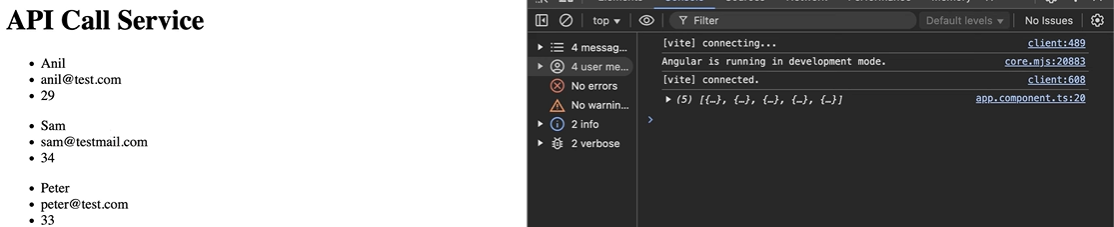

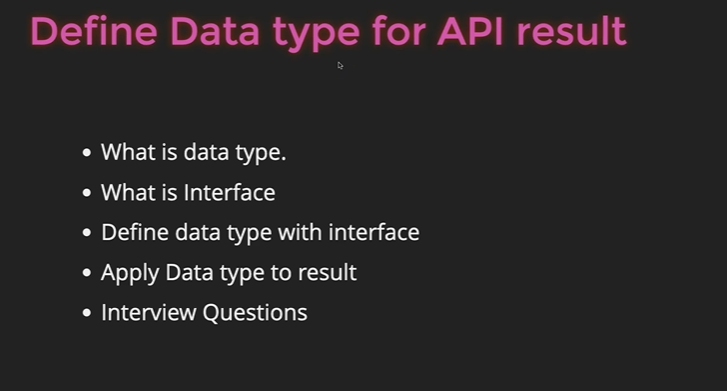

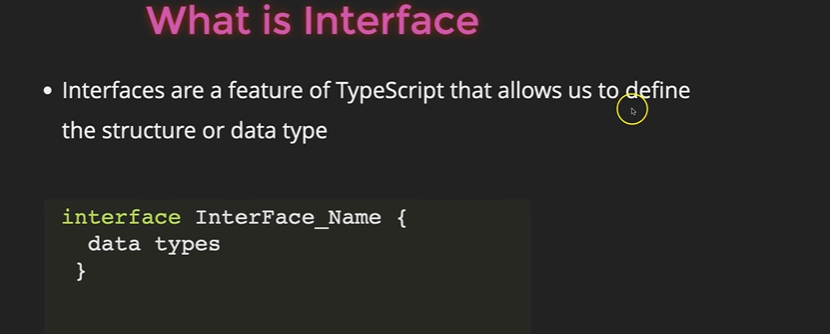

# **app.ts**



```
<h1>API Call Service</h1>

@for (user of users; track user) {
  <ul>
    <li>{{ user.name }}</li>
    <li>{{ user.email }}</li>
  </ul>
}
```



# **app.ts**



```
import { Component, OnInit } from '@angular/core';
import { CommonModule } from '@angular/common';
import { HttpClientModule } from '@angular/common/http';

import { UsersService } from './services/users';
import { User } from './interfaces/user';

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [CommonModule, HttpClientModule],
  templateUrl: './app.html',
  styleUrls: ['./app.css'],
  providers: [UsersService] // ✅ Ensure service is injectable
})
export class App implements OnInit {
  users: User[] = []; // ✅ Should be an array

  constructor(private userService: UsersService) {}

  ngOnInit() {
    this.userService.getUsers().subscribe((data: User[]) => {
      this.users = data;
      console.log(this.users);
    });
  }
}

```



# **servies-user.ts**



```
import { Injectable } from '@angular/core';
import { HttpClient } from '@angular/common/http';
import { Observable } from 'rxjs';
import { User } from '../interfaces/user';

@Injectable({
  providedIn: 'root'
})
export class UsersService {
  private url = 'http://localhost:3000/users';

  constructor(private http: HttpClient) {}

  getUsers():Observable<any> {
    return this.http.get<User[]>(this.url);
  }
}
```



# **interface-users.ts**



```
export interface User{
 name: string;
  email: string;
  id:string;
}
```



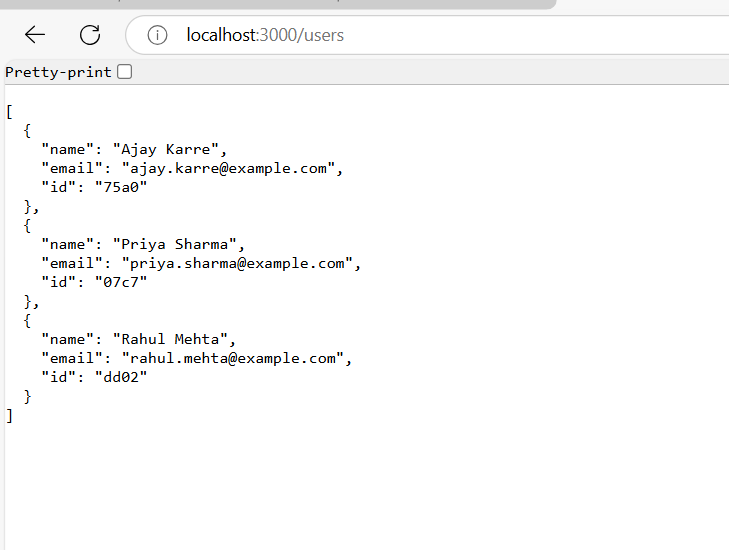

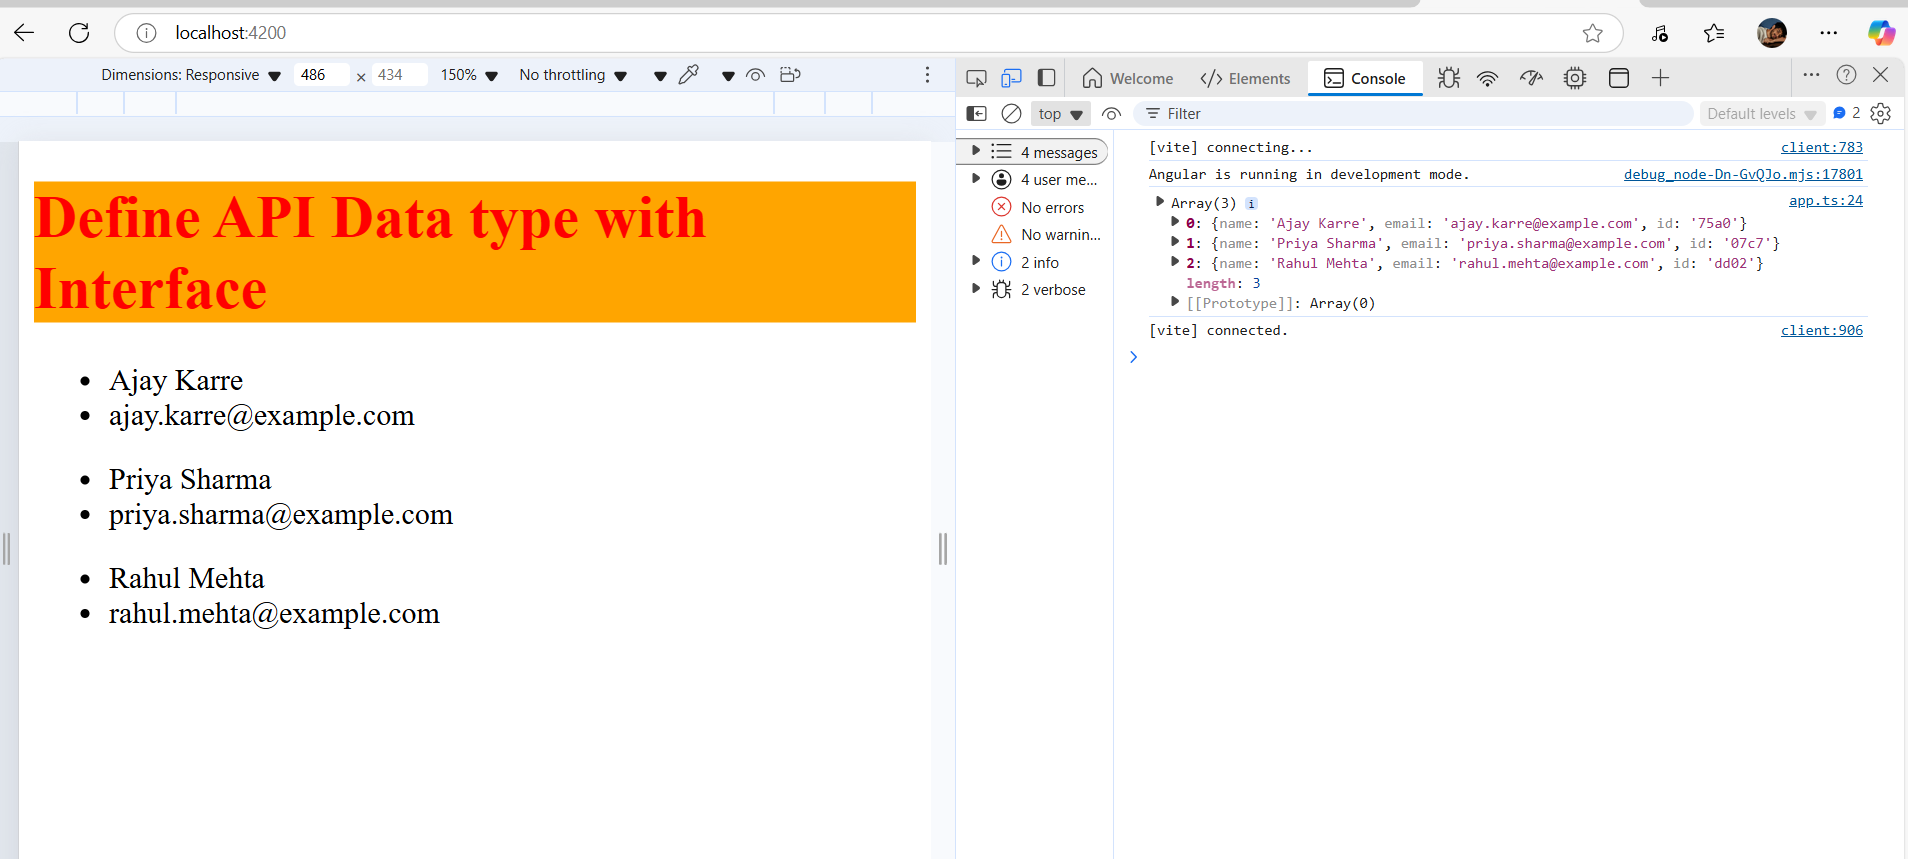

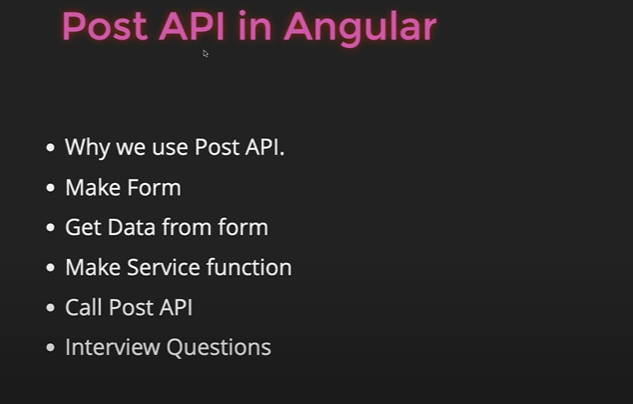

# **ngmodel is easy show the data in component**

# **app.html**



```
<h1>How to Use the POST API</h1>

<form #userForm="ngForm" (ngSubmit)="addUser()">
  <input type="text" name="name" placeholder="Enter name" [(ngModel)]="newUser.name" required />
  <br><br>
  <input type="email" name="email" placeholder="Enter email" [(ngModel)]="newUser.email" required />
  <br><br>
  <input type="text" name="id" placeholder="Enter ID" [(ngModel)]="newUser.id" required />
  <br><br>
  <button type="submit">Add User</button>
</form>

@for (user of users; track user.id) {
  <ul>
    <li>{{ user.name }}</li>
    <li>{{ user.email }}</li>
    <li>{{ user.id }}</li>
  </ul>
}


```



# **app.ts**



```
import { Component, OnInit } from '@angular/core';
import { CommonModule } from '@angular/common';
import { HttpClientModule } from '@angular/common/http';
import { FormsModule } from '@angular/forms';

import { UsersService } from './services/users';
import { User } from './interfaces/user';

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [CommonModule, HttpClientModule, FormsModule],
  templateUrl: './app.html',
  styleUrls: ['./app.css'],
  providers: [UsersService]
})
export class App implements OnInit {
  users: User[] = [];

  // ✅ This will bind to the form inputs
  newUser: User = {
    id: '',
    name: '',
    email: ''
  };

  constructor(private usersService: UsersService) {}

  ngOnInit() {
    this.getUser();
  }

  getUser() {
    this.usersService.getUsers().subscribe((data: User[]) => {
      this.users = data;
    });
  }

  addUser() {
    // Ensure ID is string
    this.newUser.id = Date.now().toString(); // or use uuid
    this.usersService.saveUsers(this.newUser).subscribe((data: User) => {
      if (data) {
        this.getUser();
        this.resetForm();
      }
    });
  }

  resetForm() {
    this.newUser = {
      id: '',
      name: '',
      email: ''
    };
  }
}

```



# **services-users.ts**



```
import { Injectable } from '@angular/core';
import { HttpClient } from '@angular/common/http';
import { Observable } from 'rxjs';
import { User } from '../interfaces/user';

@Injectable({
  providedIn: 'root'
})
export class UsersService {
  private url = 'http://localhost:3000/users';

  constructor(private http: HttpClient) {}

  getUsers():Observable<any> {
    return this.http.get<User[]>(this.url);
  }
  saveUsers(user:User):Observable<any> {
    return this.http.get<User[]>(this.url);
  }
}
```



# **interfaces-user.ts**



```
export interface User{
 name: string;
  email: string;
  id:string;
}
```



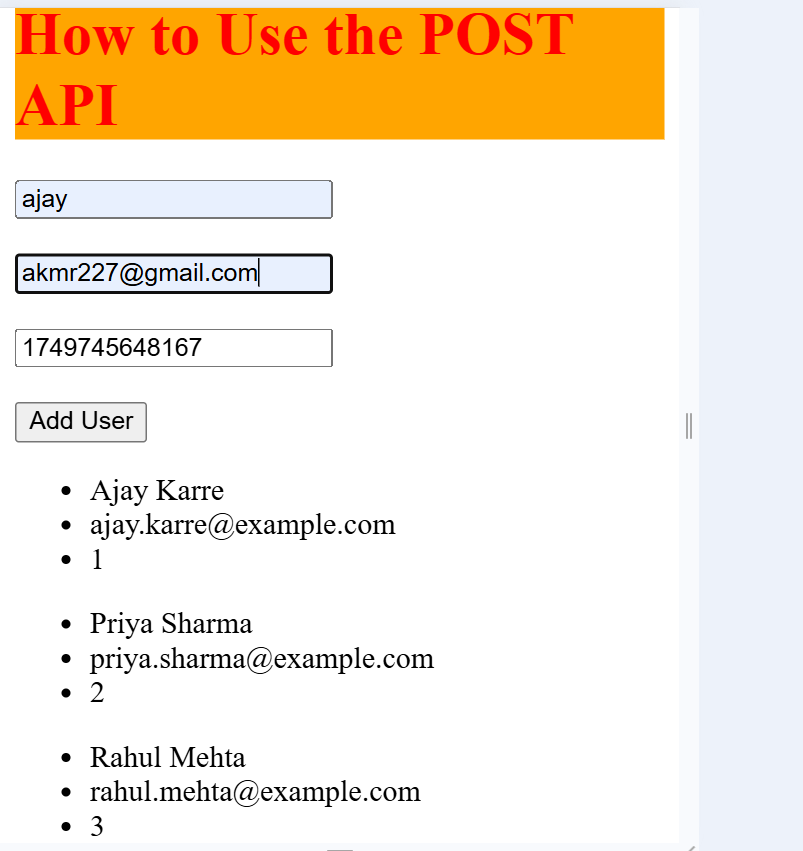